# Assignment 1 - Data Science Technology and Systems PG

## Bilal Azam - u3232335

### Import Data

Before we start our analysis, we will import our data files using pandas `pd.read_csv()` function read the CSV file data into pandas dataframe.

We will also use geopandas `gpd.read_file()` funciton to read the json file. JSON file is a key value pair like python dictionary, and contains sydney's restaurants polygon coordinates.

In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv("./data/zomato_df_final_data.csv")
gdf = gpd.read_file('./data/sydney.geojson')

### Descriptive Analysis

Now moving on to descriptive analysis, we will explore the dataset by displaying the total number of rows and columns, the data types of each column, and basic statistics such as missing values and summary statistics to better understand the structure and quality of the data.

In [4]:
# size of our zomato datasets
df.size

178500

In [5]:
# showing top 5 rows to view the data that is inside the data frame
df.head(5)

,address,cost,cuisine,lat,link,lng,phone,rating_number,rating_text,subzone,title,type,votes,groupon,color,cost_2,cuisine_color
0,"371A Pitt Street, CBD, Sydney",50.0,"['Hot Pot', 'Korean BBQ', 'BBQ', 'Korean']",-33.876059,https://www.zomato.com/sydney/sydney-madang-cbd,151.207605,02 8318 0406,4.0,Very Good,CBD,Sydney Madang,['Casual Dining'],1311.0,False,#e15307,5.243902,#6f706b
1,"Shop 7A, 2 Huntley Street, Alexandria, Sydney",80.0,"['Cafe', 'Coffee and Tea', 'Salad', 'Poké']",-33.910999,https://www.zomato.com/sydney/the-grounds-of-a...,151.193793,02 9699 2225,4.6,Excellent,"The Grounds of Alexandria, Alexandria",The Grounds of Alexandria Cafe,['Café'],3236.0,False,#9c3203,7.560976,#6f706b
2,"Level G, The Darling at the Star, 80 Pyrmont ...",120.0,['Japanese'],-33.867971,https://www.zomato.com/sydney/sokyo-pyrmont,151.195210,1800 700 700,4.9,Excellent,"The Star, Pyrmont",Sokyo,['Fine Dining'],1227.0,False,#7f2704,10.650407,#6f706b
3,"Sydney Opera House, Bennelong Point, Circular...",270.0,['Modern Australian'],-33.856784,https://www.zomato.com/sydney/bennelong-restau...,151.215297,02 9240 8000,4.9,Excellent,Circular Quay,Bennelong Restaurant,"['Fine Dining', 'Bar']",278.0,False,#7f2704,22.235772,#4186f4
4,"20 Campbell Street, Chinatown, Sydney",55.0,"['Thai', 'Salad']",-33.879035,https://www.zomato.com/sydney/chat-thai-chinatown,151.206409,02 8317 4811,4.5,Excellent,Chinatown,Chat Thai,['Casual Dining'],2150.0,False,#a83703,5.630081,#6f706b


In [6]:
# data types of all the columns
df.dtypes

address           object
cost             float64
cuisine           object
lat              float64
link              object
lng              float64
phone             object
rating_number    float64
rating_text       object
subzone           object
title             object
type              object
votes            float64
groupon             bool
color             object
cost_2           float64
cuisine_color     object
dtype: object

In [7]:
# printing null values
df.isna().sum()

address             0
cost              346
cuisine             0
lat               192
link                0
lng               192
phone               0
rating_number    3316
rating_text      3316
subzone             0
title               0
type               48
votes            3316
groupon             0
color               0
cost_2            346
cuisine_color       0
dtype: int64

### Question 1: How many unique cuisines are served by Sydney restaurants?

In [8]:
import re

cuisines = set()

def parse_cuisine_column_value(str):
    txt = re.sub(r',\s*', '=', str)
    txt = re.sub(r'[\'\[\],]', "", txt)
    temp = txt.split("=")
    for cuisine in temp:
        cuisines.add(cuisine)

for value in df["cuisine"]:
    parse_cuisine_column_value(value)
len(cuisines)

134

### Questsion 2: Suburbs (top 3) have the highest number of restaurants

In [9]:
result = df["subzone"].value_counts().sort_values(ascending=False).head(3)
result

subzone
CBD            476
Surry Hills    260
Parramatta     225
Name: count, dtype: int64

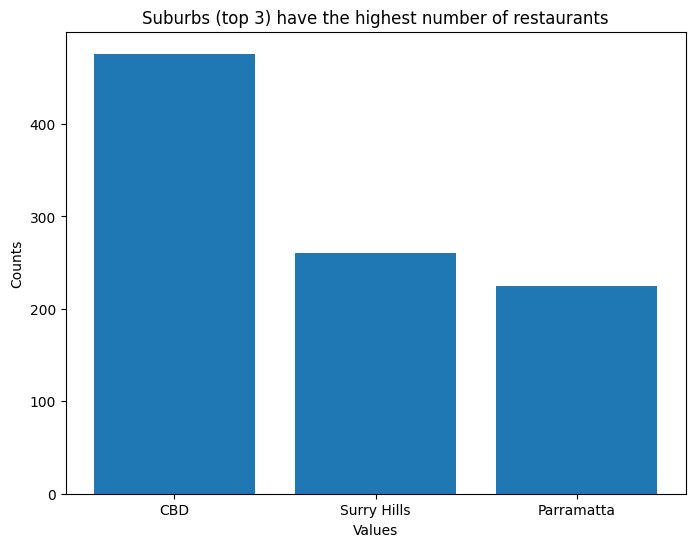

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.bar(result.index, result.values)
plt.xlabel('Values')
plt.ylabel('Counts')
plt.title('Suburbs (top 3) have the highest number of restaurants')
plt.show()

### Question 3: Restaurants with ‘excellent’ rating are mostly very expensive while those with ‘Poor’ rating are rarely expensive.

The bar chart shows that restaurant with "Excellent" ratings are usually most expensive. On the other hand "poor" rating restaurants are rarely expensive.


In [11]:
result = df.groupby('rating_text')['cost'].mean().reset_index()
result.columns = ['rating', 'average_cost']
result = result.sort_values(by='average_cost', ascending=False)
result

,rating,average_cost
1,Excellent,101.666667
4,Very Good,71.515810
2,Good,59.528114
3,Poor,55.845771
0,Average,51.021267


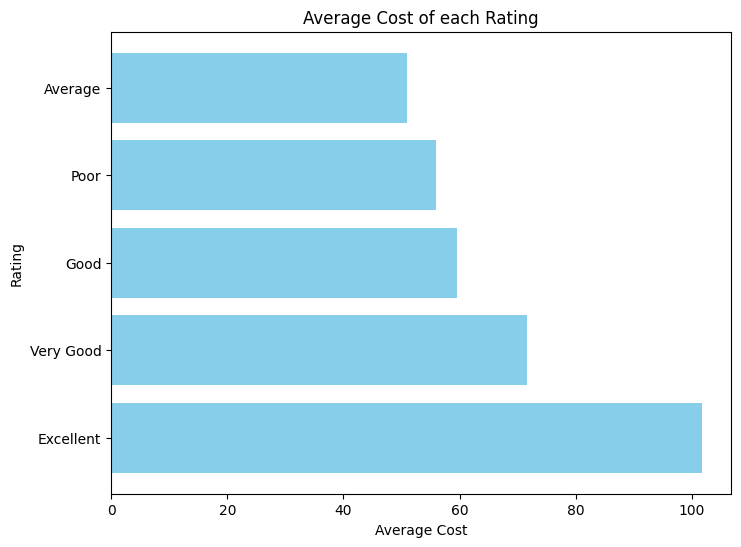

In [12]:
plt.figure(figsize=(8, 6))
plt.barh(result['rating'], result['average_cost'], color='skyblue')

plt.xlabel('Average Cost')
plt.ylabel('Rating')
plt.title('Average Cost of each Rating')
plt.show()

### Exploratory analysis
We are now proceeding with Exploratory Data Analysis (EDA) to gain insights into the dataset. This process involves visualizing relationships, distributions, and patterns in the data using various graphs. We will create histograms, box plots, scatter plots, and correlation matrices to identify trends and outliers. These visualizations will help us uncover hidden patterns and guide further analysis.

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10500 entries, 0 to 10499
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   address        10500 non-null  object 
 1   cost           10154 non-null  float64
 2   cuisine        10500 non-null  object 
 3   lat            10308 non-null  float64
 4   link           10500 non-null  object 
 5   lng            10308 non-null  float64
 6   phone          10500 non-null  object 
 7   rating_number  7184 non-null   float64
 8   rating_text    7184 non-null   object 
 9   subzone        10500 non-null  object 
 10  title          10500 non-null  object 
 11  type           10452 non-null  object 
 12  votes          7184 non-null   float64
 13  groupon        10500 non-null  bool   
 14  color          10500 non-null  object 
 15  cost_2         10154 non-null  float64
 16  cuisine_color  10500 non-null  object 
dtypes: bool(1), float64(6), object(10)
memory usage: 1

### Categorial Variables
Getting the list of categorical variables that are of object type.

In [14]:
categorical = [var for var in df.columns if df[var].dtype=='O']
categorical

['address',
 'cuisine',
 'link',
 'phone',
 'rating_text',
 'subzone',
 'title',
 'type',
 'color',
 'cuisine_color']

In [15]:
df[categorical].head(5)

,address,cuisine,link,phone,rating_text,subzone,title,type,color,cuisine_color
0,"371A Pitt Street, CBD, Sydney","['Hot Pot', 'Korean BBQ', 'BBQ', 'Korean']",https://www.zomato.com/sydney/sydney-madang-cbd,02 8318 0406,Very Good,CBD,Sydney Madang,['Casual Dining'],#e15307,#6f706b
1,"Shop 7A, 2 Huntley Street, Alexandria, Sydney","['Cafe', 'Coffee and Tea', 'Salad', 'Poké']",https://www.zomato.com/sydney/the-grounds-of-a...,02 9699 2225,Excellent,"The Grounds of Alexandria, Alexandria",The Grounds of Alexandria Cafe,['Café'],#9c3203,#6f706b
2,"Level G, The Darling at the Star, 80 Pyrmont ...",['Japanese'],https://www.zomato.com/sydney/sokyo-pyrmont,1800 700 700,Excellent,"The Star, Pyrmont",Sokyo,['Fine Dining'],#7f2704,#6f706b
3,"Sydney Opera House, Bennelong Point, Circular...",['Modern Australian'],https://www.zomato.com/sydney/bennelong-restau...,02 9240 8000,Excellent,Circular Quay,Bennelong Restaurant,"['Fine Dining', 'Bar']",#7f2704,#4186f4
4,"20 Campbell Street, Chinatown, Sydney","['Thai', 'Salad']",https://www.zomato.com/sydney/chat-thai-chinatown,02 8317 4811,Excellent,Chinatown,Chat Thai,['Casual Dining'],#a83703,#6f706b


### Numerical Variables
Getting the list of numerical variables who datatype is numeric.

In [16]:
numerical = [col for col in df.columns.tolist() if col not in categorical]
numerical

['cost', 'lat', 'lng', 'rating_number', 'votes', 'groupon', 'cost_2']

In [17]:
# show top 5 numerical variables
df[numerical].head(5)

,cost,lat,lng,rating_number,votes,groupon,cost_2
0,50.0,-33.876059,151.207605,4.0,1311.0,False,5.243902
1,80.0,-33.910999,151.193793,4.6,3236.0,False,7.560976
2,120.0,-33.867971,151.195210,4.9,1227.0,False,10.650407
3,270.0,-33.856784,151.215297,4.9,278.0,False,22.235772
4,55.0,-33.879035,151.206409,4.5,2150.0,False,5.630081


In [18]:
## describe numerical variables
df[numerical].describe()

,cost,lat,lng,rating_number,votes,cost_2
count,10154.000000,10308.000000,10308.000000,7184.000000,7184.000000,10154.000000
mean,51.153240,-32.921377,148.067359,3.283672,83.581013,5.332974
std,27.799485,8.263449,26.695402,0.454580,175.117966,2.147115
min,8.000000,-37.858473,-123.270371,1.800000,4.000000,2.000000
25%,30.000000,-33.899094,151.061061,3.000000,12.000000,3.699187
50%,45.000000,-33.872741,151.172468,3.300000,32.000000,4.857724
75%,60.000000,-33.813451,151.208940,3.600000,87.000000,6.016260
max,500.000000,51.500986,152.869052,4.900000,3236.000000,40.000000


### Empty Values
Now, we will address any missing values in the dataset. This step involves identifying columns. 

In [19]:
df.isna().sum()

address             0
cost              346
cuisine             0
lat               192
link                0
lng               192
phone               0
rating_number    3316
rating_text      3316
subzone             0
title               0
type               48
votes            3316
groupon             0
color               0
cost_2            346
cuisine_color       0
dtype: int64

### Cuisine Variable
Cuisine variable is a list of strings, but its data type is string so we need to transform it first to a valid list object before doing modelling.

In [20]:
df['cuisine'].head(5)

0     ['Hot Pot', 'Korean BBQ', 'BBQ', 'Korean']
1    ['Cafe', 'Coffee and Tea', 'Salad', 'Poké']
2                                   ['Japanese']
3                          ['Modern Australian']
4                              ['Thai', 'Salad']
Name: cuisine, dtype: object

### Type Variable
Type variable is another list of strings, but its data type is string so we need to transform it first to a valid list object before doing modelling.

In [21]:
df['type'].head(5)

0         ['Casual Dining']
1                  ['Café']
2           ['Fine Dining']
3    ['Fine Dining', 'Bar']
4         ['Casual Dining']
Name: type, dtype: object

### Cost And Rating Frequency

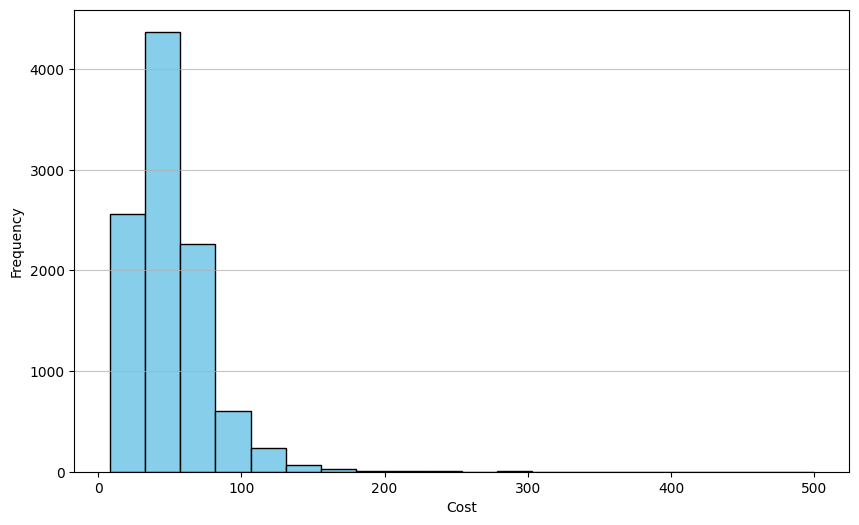

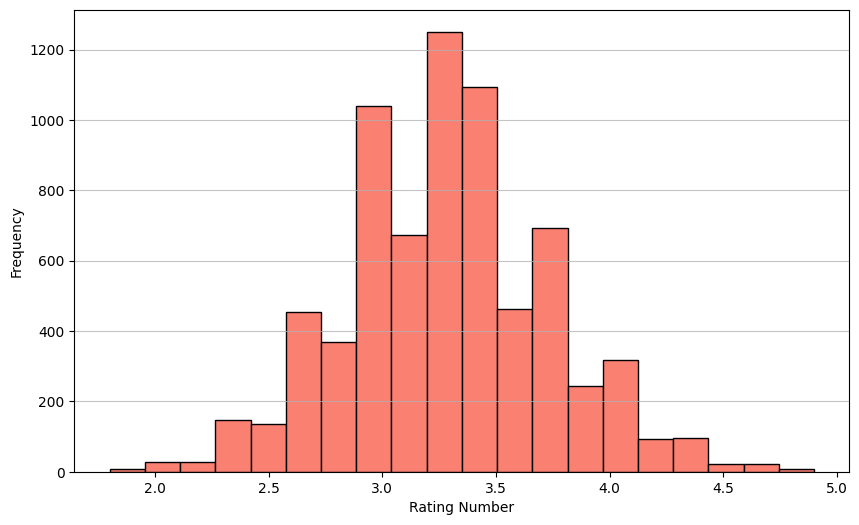

Descriptive Statistics for 'cost':
count    10154.000000
mean        51.153240
std         27.799485
min          8.000000
25%         30.000000
50%         45.000000
75%         60.000000
max        500.000000
Name: cost, dtype: float64

Descriptive Statistics for 'rating_number':
count    7184.000000
mean        3.283672
std         0.454580
min         1.800000
25%         3.000000
50%         3.300000
75%         3.600000
max         4.900000
Name: rating_number, dtype: float64


In [22]:
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(df["cost"], bins=20, color='skyblue', edgecolor='black')
plt.xlabel("Cost")
plt.ylabel("Frequency")
plt.grid(axis='y', alpha=0.75)
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(df["rating_number"], bins=20, color='salmon', edgecolor='black')
plt.xlabel("Rating Number")
plt.ylabel("Frequency")
plt.grid(axis='y', alpha=0.75)
plt.show()


cost_description = df["cost"].describe()
rating_number_description = df["rating_number"].describe()

print("Descriptive Statistics for 'cost':")
print(cost_description)

print("\nDescriptive Statistics for 'rating_number':")
print(rating_number_description)

### Identify Outliers

In the end, we will identify outliers in the numerical columns to detect any unusual or extreme values that may affect the analysis.

In [23]:
def find_outliers(variable, factor= 3, print_summary=True):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)
    Lower_boundary = df[variable].quantile(0.25) - (IQR * factor)
    Upper_boundary = df[variable].quantile(0.75) + (IQR * factor)
    
    outliers= []
    for index, val in enumerate(df[variable]):
        if val < Lower_boundary or val > Upper_boundary:
            outliers.append(index)
    
    
    if(print_summary):
        print('{variable} outliers are values < {lowerboundary} or > {upperboundary}'.format(variable= variable, lowerboundary=Lower_boundary, upperboundary=Upper_boundary))
    return Lower_boundary, Upper_boundary

for col in df[numerical].columns:
    find_outliers(col)

cost outliers are values < -60.0 or > 150.0
lat outliers are values < -34.15602480000001 or > -33.55652029999999
lng outliers are values < 150.61742475000003 or > 151.65257705
rating_number outliers are values < 1.1999999999999997 or > 5.4
votes outliers are values < -213.0 or > 312.0


TypeError: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

### Cuisine Density Map

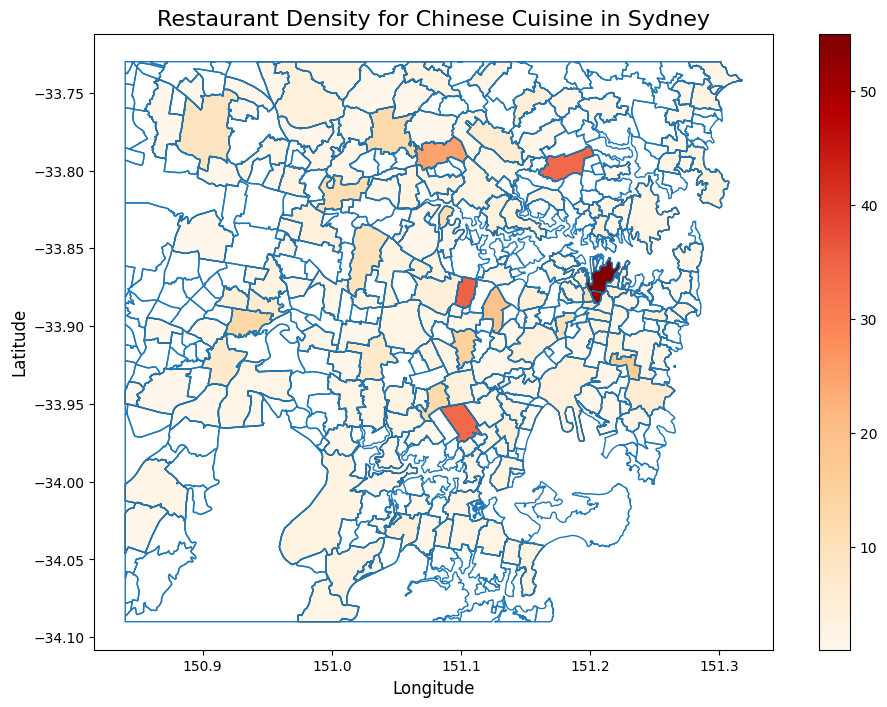

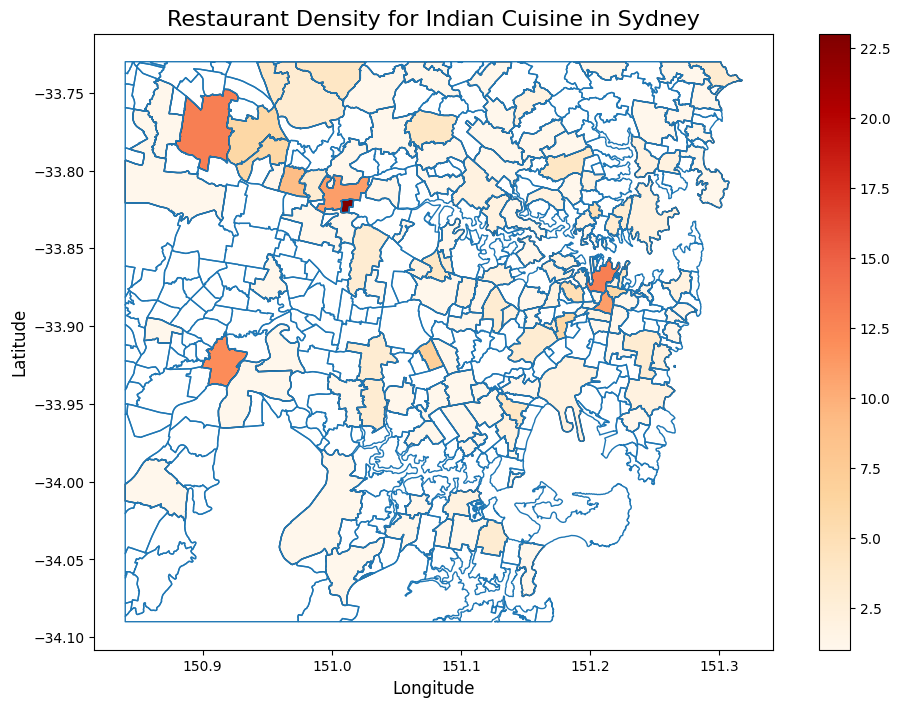

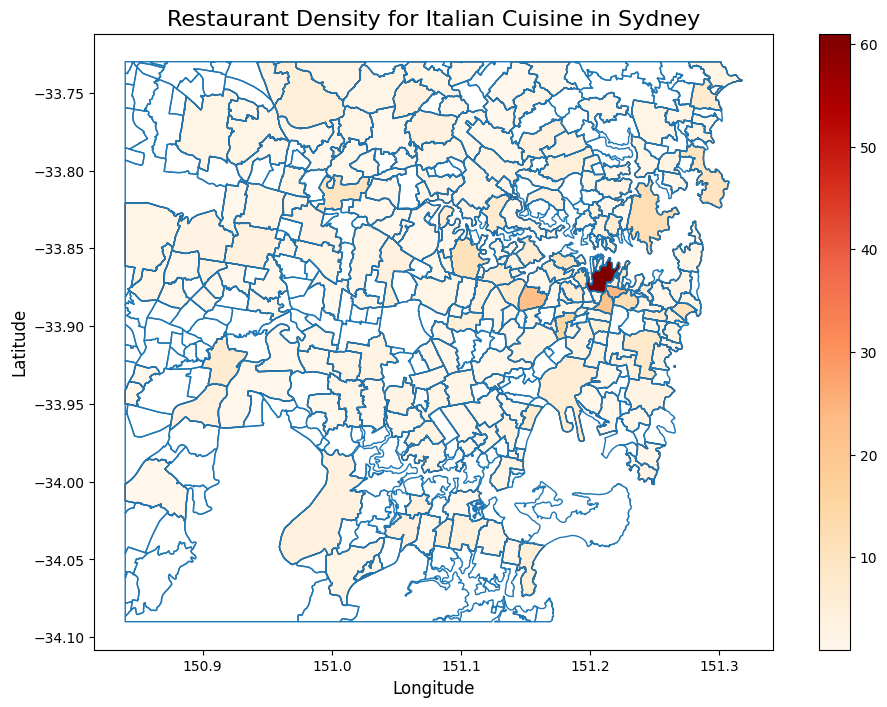

In [39]:
def cuisine_density_map(restaurant_data, sydney_geo, cuisine_type):
    filtered_restaurants = restaurant_data[restaurant_data['cuisine'].apply(lambda x: cuisine_type in x)]

    # Convert the restaurant data into a GeoDataFrame using lat/lng as the geometry
    gdf_restaurants = gpd.GeoDataFrame(filtered_restaurants, 
                                       geometry=gpd.points_from_xy(filtered_restaurants['lng'], filtered_restaurants['lat']),
                                       crs="EPSG:4326")

    # Perform a spatial join to find which suburb each restaurant is located in
    restaurants_in_suburbs = gpd.sjoin(gdf_restaurants, sydney_geo, how="inner", predicate='within')

    # Count the number of restaurants in each suburb for the selected cuisine
    suburb_density = restaurants_in_suburbs.groupby('SSC_NAME').size().reset_index(name='restaurant_count')

    # Merge the density data with the geojson file based on SSC_NAME (suburb name)
    sydney_geo = sydney_geo.merge(suburb_density, how='left', left_on='SSC_NAME', right_on='SSC_NAME')

    # Plot the map
    fig, ax = plt.subplots(1, 1, figsize=(12, 8))
    sydney_geo.boundary.plot(ax=ax, linewidth=1)
    sydney_geo.plot(column='restaurant_count', ax=ax, legend=True, cmap='OrRd', edgecolor='black')

    # Add title and labels
    plt.title(f'Restaurant Density for {cuisine_type} Cuisine in Sydney', fontsize=16)
    plt.xlabel('Longitude', fontsize=12)
    plt.ylabel('Latitude', fontsize=12)
    
    plt.show()

cuisine_density_map(df, gdf, 'Chinese')
cuisine_density_map(df, gdf, 'Indian')
cuisine_density_map(df, gdf, 'Italian')